# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
# Importando as bibliotecas.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando os dados.
df = pd.read_csv("previsao_de_renda.csv")
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
# Filtrando dados qualitativos da base.
df_filtrado = df[['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']]

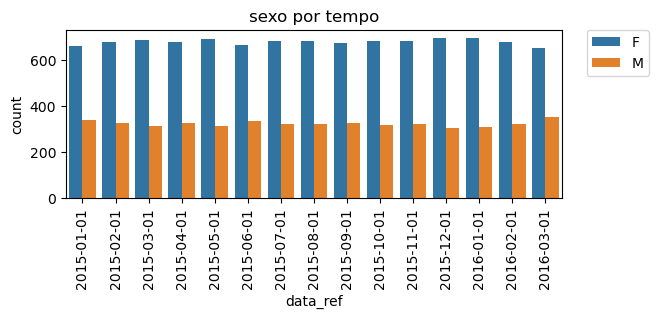

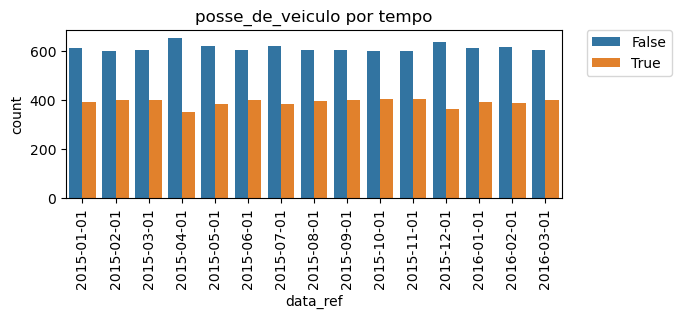

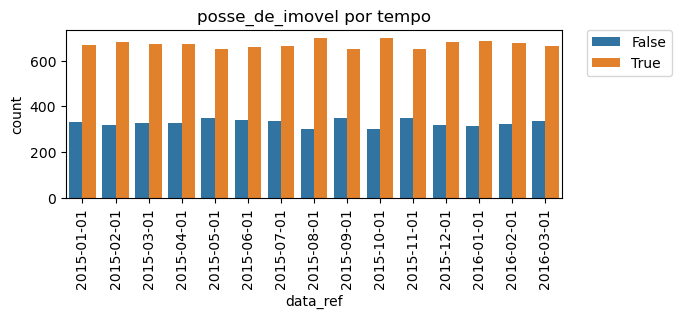

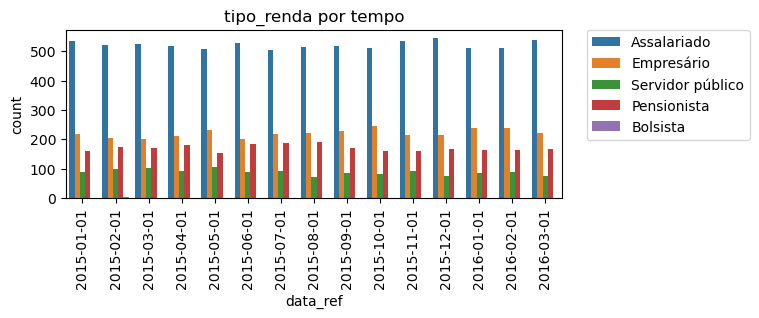

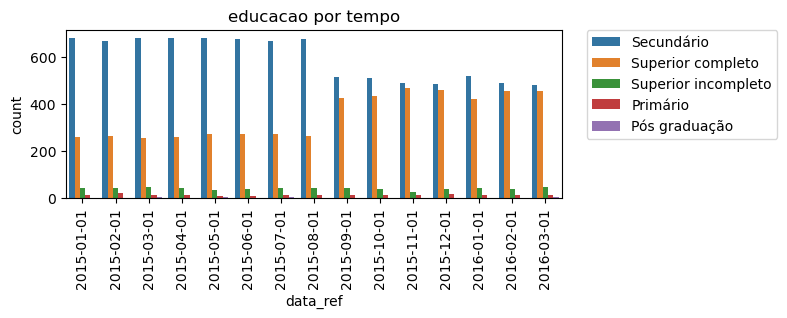

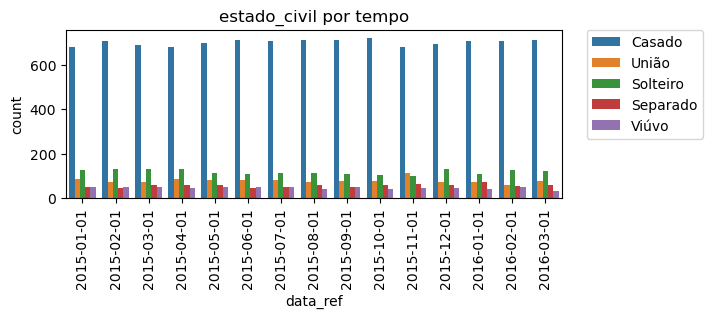

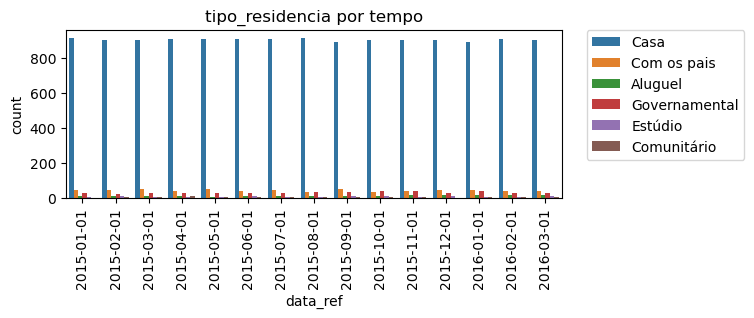

In [6]:
# Plotando os gráficos de contagem para todas as variáveis qualitativas.
cont=1
for var in df_filtrado.columns[1:]:
  plt.subplot(2,1,cont)
  cont =+ 1
  sns.countplot(df, x='data_ref', hue=var)
  plt.title(f'{var} por tempo')
  plt.xticks(rotation=90)
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

Plotando esses gráficos podemos notar que apenas a coluna com dados de escolaridade não apresentou um resultado equilibrado, tendo uma mudança abrupta do mês 08 para o mês 09.

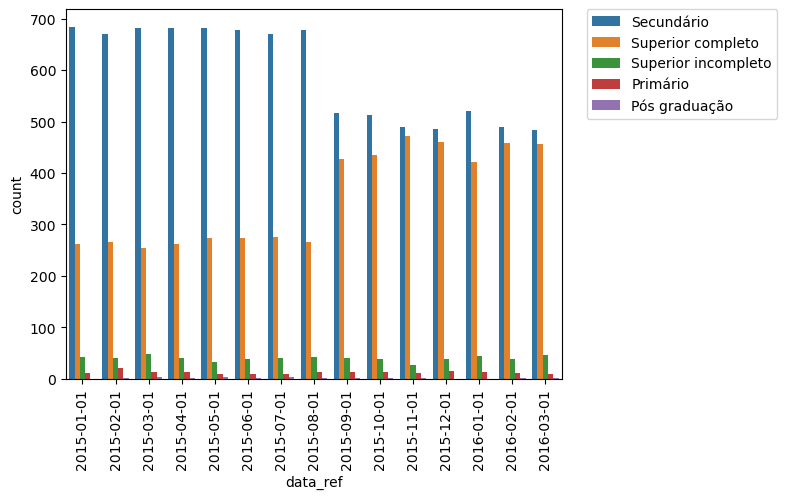

In [7]:
# Analisando o gráfico de escolaridade mais de perto.
ax = sns.countplot(x='data_ref', hue='educacao', data= df_filtrado)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [8]:
# Criando um novo dataframe apenas com variáveis qualitativas.
df_qualitativa = df.select_dtypes(include='object')

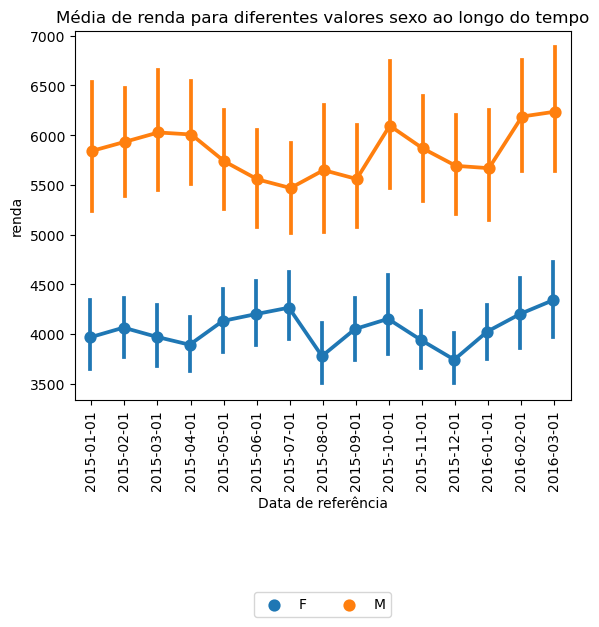

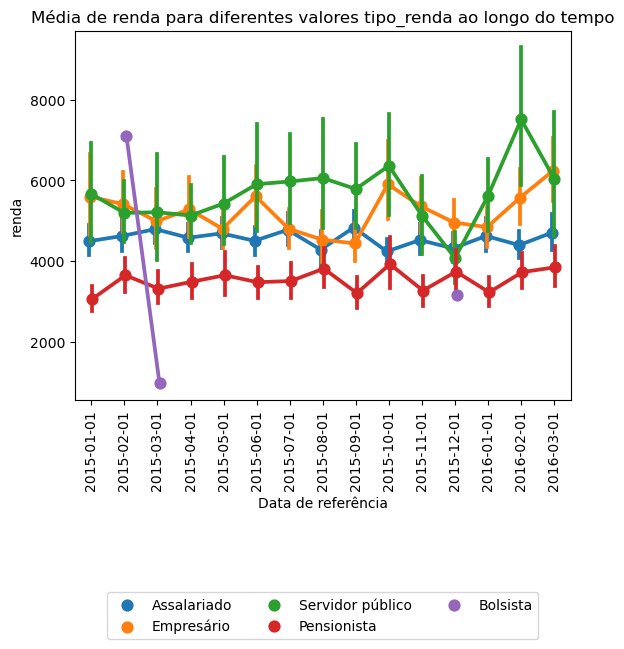

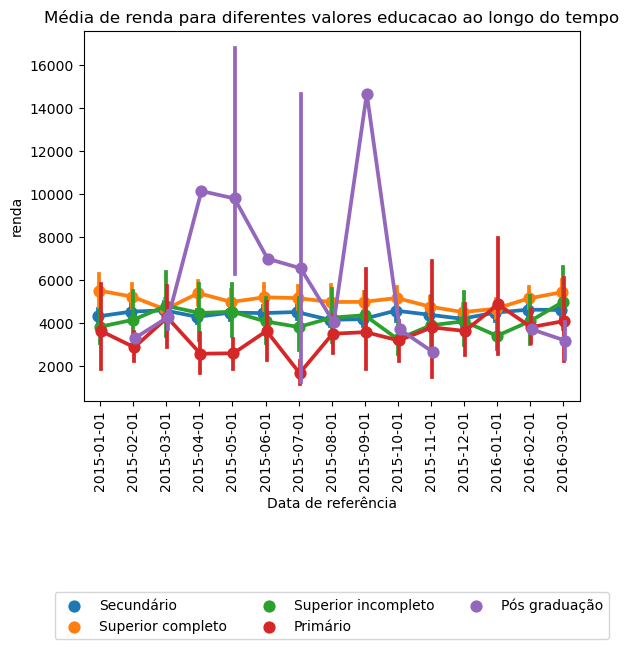

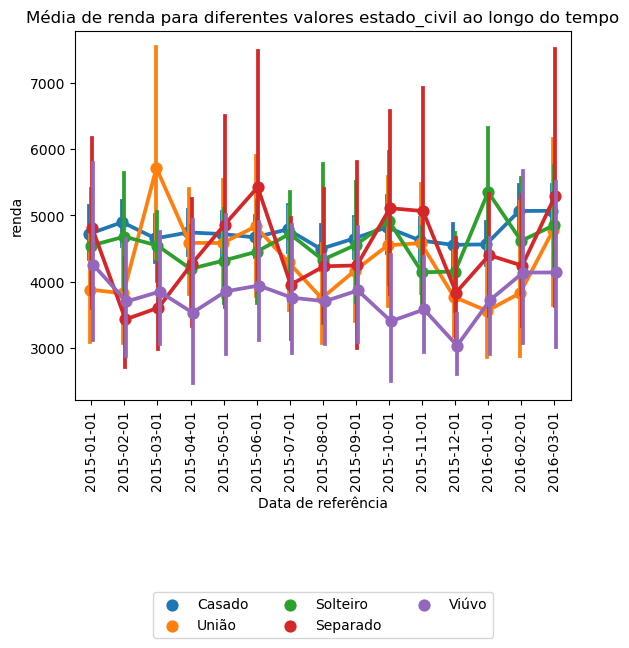

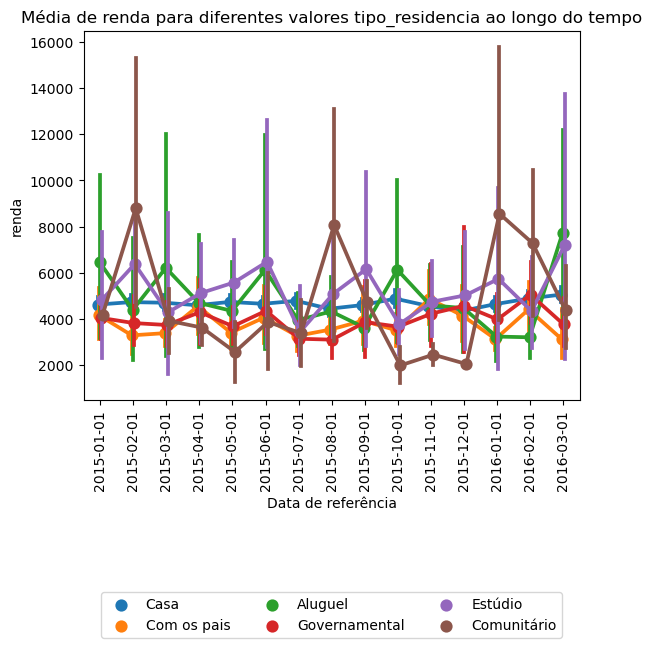

In [9]:
# Plotando os gráficos de contagem para todas as variáveis qualitativas.
cont = 1
for col in df_qualitativa.columns[1:]:
  plt.subplot(1,1,cont)
  cont=+ 1
  sns.pointplot(x="data_ref", y="renda", hue = col,
                    data=df, dodge=True, errorbar=('ci', 95))
  plt.title(f'Média de renda para diferentes valores {col} ao longo do tempo')
  plt.xticks(rotation=90)
  plt.xlabel('Data de referência')
  plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -.50),ncol = 3)
  plt.show()